In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score

In [17]:
# Wczytaj dane
df = pd.read_csv('pd_speech_features.csv')

# Usuwamy kolumnę ID jeśli występuje
if 'id' in df.columns:
    df = df.drop('id', axis=1)

print("Braki danych:", df.isnull().sum().sum())

Braki danych: 0


In [15]:
# --- REGRESJA LINIOWA ---
# Przewidujemy wartość PPE na podstawie pozostałych cech (bez 'class' i 'PPE')
y_reg = df['PPE']
X_reg = df.drop(['class', 'PPE'], axis=1)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

reg = LinearRegression()
reg.fit(X_reg_train, y_reg_train)
y_reg_pred = reg.predict(X_reg_test)

print("Regresja liniowa:")
print("MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("R2:", r2_score(y_reg_test, y_reg_pred))


Regresja liniowa:
MSE: 2.175359671385058
R2: -64.18170384169431



Klasyfikacja SVM:
Accuracy: 0.8223684210526315
              precision    recall  f1-score   support

           0       0.80      0.41      0.54        39
           1       0.83      0.96      0.89       113

    accuracy                           0.82       152
   macro avg       0.81      0.69      0.72       152
weighted avg       0.82      0.82      0.80       152



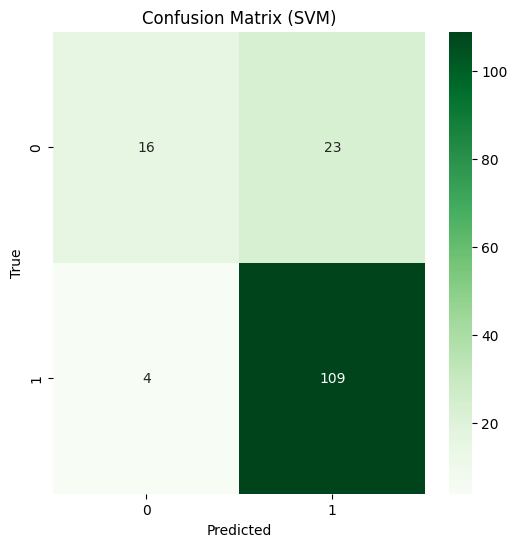

In [ ]:
# --- KLASYFIKACJA BINARNA SVM ---
# Przygotowanie danych
X = df.drop('class', axis=1)
y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)

print("\nKlasyfikacja SVM:")
print("Accuracy:", accuracy_score(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_svm_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()